<center><font size="+4">Introduction to Programming and Machine Learning in Python 2020/2021</font></center>
<center><font size="+2">Scuola Normale Superiore, Pisa, Italy</font></center>

<center><font size="+2">Course responsibles</font></center>
<center><font size="+2">Andrea Vandin a.vandin@santannapisa.it</font></center>
<center><font size="+2">Daniele Licari d.licari@santannapisa.it</font></center>

---

<center><font size="+4">Lecture 5: </font></center>
<center><font size="+2"> Creation of word clouds for COVID-related online news</font></center>
</center>

---

# Computing and visualizing the most important words in online news

This example shows that functions can hide a lot of complexity.
* E.g., we can download remote data by just invoking a function
* In particular, in this example we will:
    1.	Download all the articles the online service [NewsAPI](https://newsapi.org/)
    2.	Combine the articles in one data
    3.	Clean data
    4.	Compute word-frequency pairs
    5.	Visualize the analysis in a Word Cloud
    
 ---

*Some definitions:*

A **web service** is an application run by a web server that can be called from a series of URLs that will return their data in a format intended for parsing by a "generic" computer program rather than by a browser. As a result, web services can use something like XML (especially SOAP or so) or JSON is used.

An **Application Programming Interface (API)** allows two systems to communicate with one another. An API exactly defines the methods for one software program to interact with the other. 

![](images/web_server_web_service.png)

This document has been __created by Daniele Licari__ and elaborated by Andrea Vandin.

## The modules we need to use

In [1]:
import sys
!{sys.executable} -m pip install newsapi-python
!{sys.executable} -m pip install wordcloud

You should consider upgrading via the 'C:\Users\d.licari\PycharmProjects\venv\env_ipdpp_gssi2021\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\d.licari\PycharmProjects\venv\env_ipdpp_gssi2021\Scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
# integrating News API into your Python application 
from newsapi import NewsApiClient 
newsapi = NewsApiClient(api_key='345f8a0aa8c64d549fde1d8343d036f8')

# creating wordclouds into your Python application 
from wordcloud import WordCloud, STOPWORDS

#  In Python, string.punctuation will give the all sets of punctuation. 
import string

import matplotlib.pyplot as plt

__NewsApiClient__ is a local client for the online service [__NewsAPI__](https://newsapi.org/) that allows you to get news from [eveywhere in the world](https://newsapi.org/sources)
* Intuitively, an online service is like an online function running in a remote server (computer)
* A local client is a piece of code runnning in your machine that communicates with the online service
  * It allows you to easily interact with the online service
  * The interaction is typically done through a set of message exchanges as prescribed by the APIs of the service
* The argument `api_key` is a univoque identifier 
  * necessary when making requests to be identified
  * can be obtained registering [here](https://newsapi.org/register)

There exist many online services accessible with Python
* Most of them follow this api-key approach
* E.g. to enforce subscriptions
<!-- * In our case, __we are using a free subscription that allows us to only get the first 250 characters from a news item__ -->

## Implementing two functions for data cleaning

__Stop words__ are usually the most common words in any text ( like “the”, “of”, “to” and “and”), 
* They don’t tell us much about the actual content in a text
* These are the words we want to ignore - this is our data cleaning

We want to find the words that will help us differentiate a text from texts that are about different subjects. 
* __We will filter out the common words__.
* Of course, we are going to use a function for doing this

Furthermore, we want to ignore punctuation 
* In Python, string.punctuation will give the all sets of punctuation.
* We are going to use it to delete all punctuation from a string

In [6]:
wordlist = "Daniele and Andrea".split()
removeStopwords(wordlist)

['Daniele', 'Andrea']

In [3]:
def removeStopwords(wordlist):
    """Removing Stop Words from a list of Strings, returns the list of Strings without the Stop Words"""
    return [w for w in wordlist if (w not in STOPWORDS) and (w not in {'usa','today','verge','bbc','cnn'})]

def removePunctuations(my_str): 
    """Removing Punctuations from a String, returns the String without the Punctuations"""
    no_punct = ""
    for char in my_str:
        if char  not in string.punctuation:
            no_punct = no_punct + char
    return no_punct

## Data loading

We first get the most relevant articles (top 100) about coronavirus, published in usa-today
* This looks like a normal function invocation
* But under the hood a lot happens to contact the remote service

Luckily, the function `get_everything` hides this complexity to us

In [10]:
#https://newsapi.org/v2/everything?q=coronavirus&language=en&sources=usa-today&pageSize=100&sortBy=relevancy&apiKey=345f8a0aa8c64d549fde1d8343d036f8

json_data = newsapi.get_everything(q='coronavirus',        # All the articles that contain this word
                                    language='en',
                                    sources = 'usa-today', # The newspaper of interest
                                    #sources = 'cnn', # The newspaper of interest
                                    #sources = 'bbc-news', # The newspaper of interest
                                    #sources = 'bbc-news,the-verge'
                                    #
                                    page_size=100,           # Get 100 articles
                                    sort_by='relevancy' 
                                    )
#There exist many more parameters allowing us the ask for more articles, different sources, etc

The return value `json_data` is just a dictionary collecting information about the remote request

In [11]:
print(type(json_data))
print()
print(json_data.keys())
print()
print('The status of the request is',json_data['status'],'There are ',json_data['totalResults'],'articles matching the request.')
print('We got',len(json_data['articles']),'articles')
print()

<class 'dict'>

dict_keys(['status', 'totalResults', 'articles'])

The status of the request is ok There are  317 articles matching the request.
We got 100 articles



We can ignore all the metadata (i.e. the data about the remote request) and focus on the actual articles only

In [12]:
articles = json_data['articles'] 

#Get the description of the first article
content = articles[0]['description']
print('The content:')
print(content)
print('The content is long',len(content),"characters")

The content:
Two-thirds of Major League Baseball's 30 teams have been able to relax coronavirus protocols. Latest COVID news.
The content is long 112 characters


Now let's combine the content of all the news into variable `contents`

In [13]:
def combine_articles(list_of_articles):
    contents = ''
    for article in list_of_articles:
         #  check if key 'description' has Non-None value in dictionary 
        if article['description']:
            contents = contents + article['description']+" "
            
    return contents

contents = combine_articles(articles)
print('Overall we have',len(contents),'characters')

Overall we have 12851 characters


## Data cleaning, Analysis and visualization 

Now begins the funny part
1. Let's clean the data removing not interesting words
2. Let's compute the frequency of use of words
3. Let's visualize graphically the computed analysis - Word Cloud

In [15]:
# 1 cleaning data
def clean_data(contents):
    print('Before cleaning')
    print(contents[:600])
    print()

    content_to_clean = contents.lower()
    clean_content = removePunctuations(content_to_clean).split()
    clean_content = removeStopwords(clean_content)
    print('After cleaning')
    print(clean_content[:200])
    print()
    return clean_content

clean_content = clean_data(contents)

Before cleaning
Two-thirds of Major League Baseball's 30 teams have been able to relax coronavirus protocols. Latest COVID news. The Delta variant has already impacted both India and the U.K. and is now in the U.S. Health experts say it could lead to a third wave in the country. Kate Middleton has received her first vaccine dose as Britain extends its inoculation program to younger residents. Latest COVID-19 news. The virus that causes COVID-19 did not originate at the Wuhan seafood market, according to a new study. Here's the latest COVID news. As COVID-19 infections down drop, this weekend is a test,  The I

After cleaning
['twothirds', 'major', 'league', 'baseballs', '30', 'teams', 'able', 'relax', 'coronavirus', 'protocols', 'latest', 'covid', 'news', 'delta', 'variant', 'already', 'impacted', 'india', 'uk', 'now', 'us', 'health', 'experts', 'say', 'lead', 'third', 'wave', 'country', 'kate', 'middleton', 'received', 'first', 'vaccine', 'dose', 'britain', 'extends', 'inoculation', '

In [17]:
#clean_content 

In [18]:
# 2 computing word-frequency pairs
def analyze_data(clean_content):
    wordcount = {}
    for w in clean_content:
        if w in wordcount:
            wordcount[w] += 1
        else:
            wordcount[w] = 1
    return wordcount

wordcount = analyze_data(clean_content)

In [22]:
type(wordcount)

dict

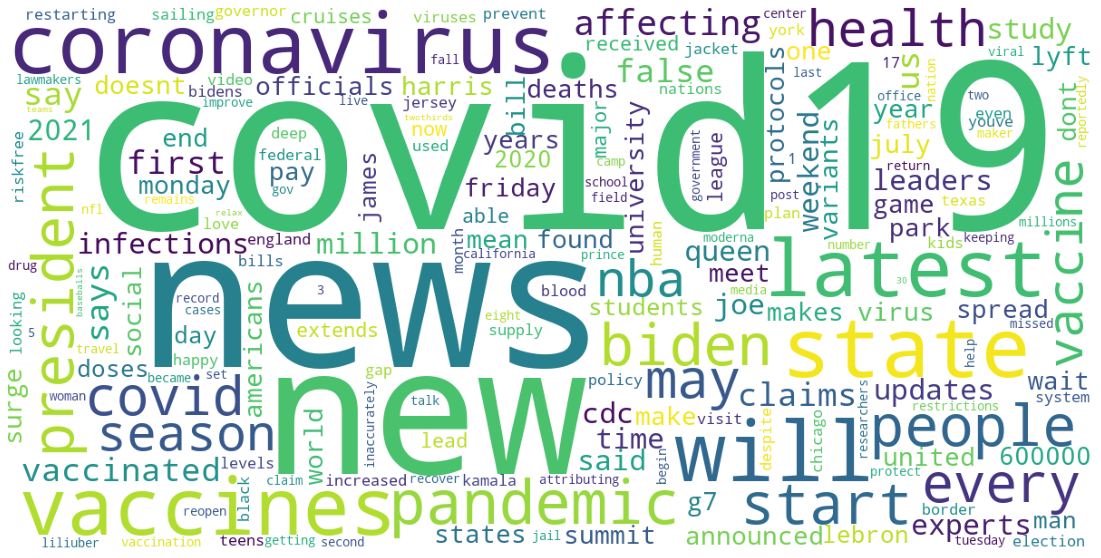

In [23]:
# 3 visualizing the analysisis in a Word Cloud
def visualize_data(wordcount):
    wc = WordCloud(width=1200,height=600, background_color='white').generate_from_frequencies(wordcount)
    plt.figure(figsize=(20,10))
    plt.imshow(wc)
    plt.axis("off")
    plt.show()

visualize_data(wordcount)

## Let's put everything in a function, so that we can run it easily for different sources

In [25]:
#import sys
#!{sys.executable} -m pip install newsapi-python
#!{sys.executable} -m pip install wordcloud

# integrating News API into your Python application 
from newsapi import NewsApiClient 
newsapi = NewsApiClient(api_key='345f8a0aa8c64d549fde1d8343d036f8')

# creating wordclouds into your Python application 
from wordcloud import WordCloud, STOPWORDS

# regular expression 
import re

import matplotlib.pyplot as plt

def make_world_cloud(query,sour,p_size=50):
    json_data = newsapi.get_everything(q=query,           # All the articles that contain this word
                                       language='en',
                                       sources=sour,      # The newspaper of interest
                                       page_size=p_size,  # Get 50 articles
                                       sort_by='relevancy'   
                                    )
    
    #Combine the articles in one data
    contents = combine_articles(json_data['articles'])
    
    # 1 cleaning data
    clean_content = clean_data(contents)

    # 2 computing word-frequency pairs
    wordcount = analyze_data(clean_content)
 
    # 3 visualizing the analysis in a Word Cloud
    visualize_data(wordcount)

Before cleaning
New research shows that people who had COVID-19 and then were vaccinated should be protected against the virus for years. Scientists are also honing in on the levels of antibodies we need for protection. COVID-19 vaccines made pharma more popular, while tech’s ratings took a nosedive over the past year. Also this week, research showed why the Alpha coronavirus variant spreads so quickly. Novavax said Monday that its COVID-19 vaccine is highly effective. It’s a different type of shot than the ones already cleared in the US. The company could file with the FDA by this fall. Taiwan’s government s

After cleaning
['new', 'research', 'shows', 'people', 'covid19', 'vaccinated', 'protected', 'virus', 'years', 'scientists', 'honing', 'levels', 'antibodies', 'need', 'protection', 'covid19', 'vaccines', 'made', 'pharma', 'popular', 'tech’s', 'ratings', 'took', 'nosedive', 'past', 'year', 'week', 'research', 'showed', 'alpha', 'coronavirus', 'variant', 'spreads', 'quickly', 'novav

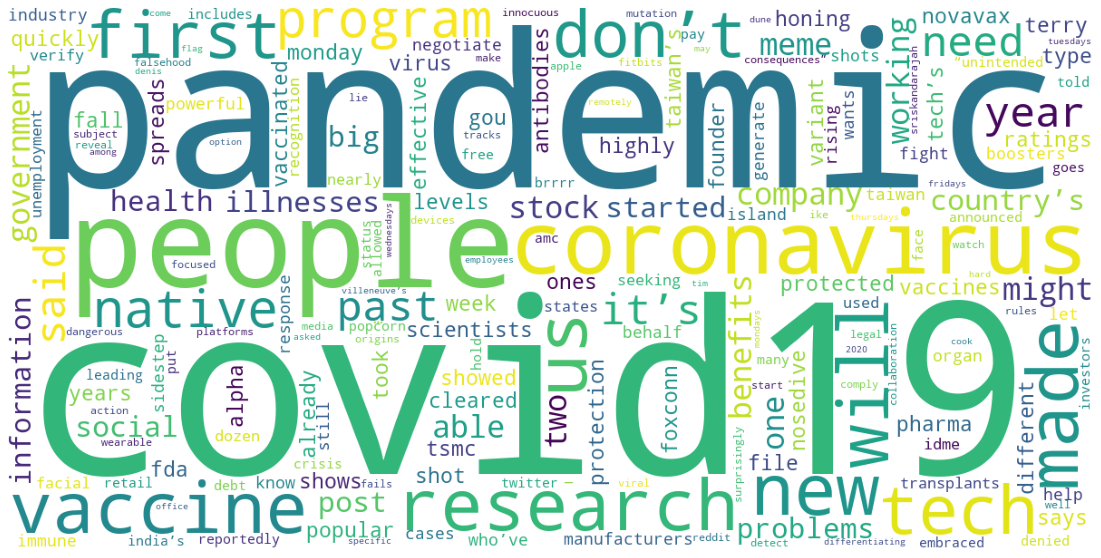

In [26]:
make_world_cloud('coronavirus','the-verge',100)

Before cleaning
The coronavirus aid plan passes despite total Republican opposition, but must now go to the Senate. Singing to the tune of her hit song Jolene, the county star, 75, promotes coronavirus vaccinations. A traditional herbal remedy said to "cure" Covid has resurfaced, but there's no evidence it works. It is the largest decline in decades and the coronavirus pandemic is a major factor, experts say. The action comes days before the country is set to begin its rollout of coronavirus vaccines. The "circuit-breaker" lockdown was designed to crush a coronavirus breach from hotel quarantine. Tanzania is 

After cleaning
['coronavirus', 'aid', 'plan', 'passes', 'despite', 'total', 'republican', 'opposition', 'must', 'now', 'go', 'senate', 'singing', 'tune', 'hit', 'song', 'jolene', 'county', 'star', '75', 'promotes', 'coronavirus', 'vaccinations', 'traditional', 'herbal', 'remedy', 'said', 'cure', 'covid', 'resurfaced', 'theres', 'evidence', 'works', 'largest', 'decline', 'decades'

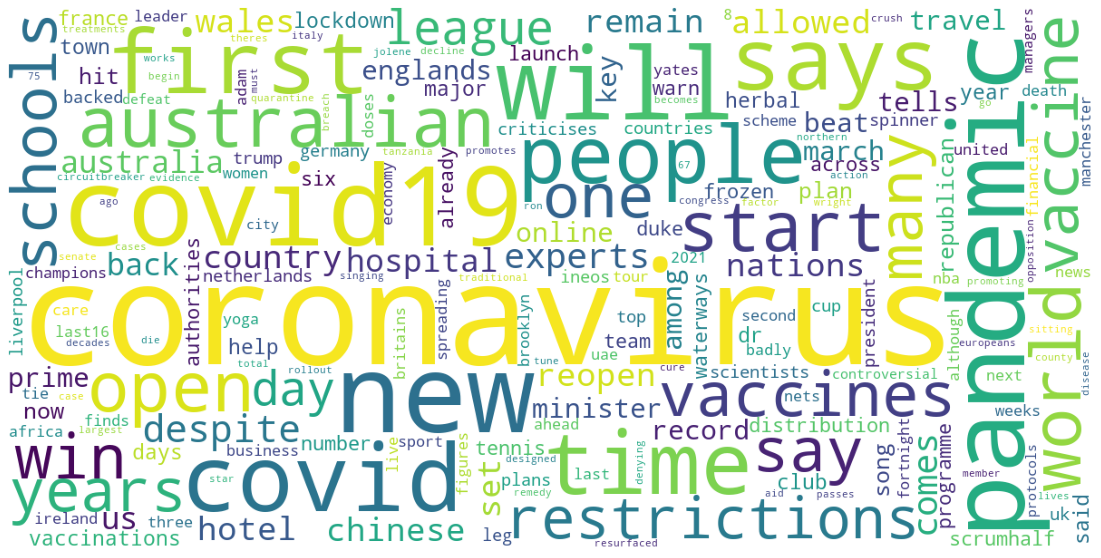

In [13]:
make_world_cloud('coronavirus','bbc-news',100)

# Excercizes

## Implementing two additional functions for data cleaning

**1. Keep only nouns**

In some Natural Language Processing tasks, it can be useful to remove the insignificant words by looking at their part-of-speech tags (noun, pronoun, verb, adjective, adverb, preposition, conjunction, etc). 
You will need to create a function to keep only nouns from a text.

**2. Text Normalization**
A word can have a high degree of inflection (study, studying, studies). You will need to create a function to normalize the text that transforms an inflected word into its dictionary form (cars -> car).



## Natural Language Tool Kit

[Natural Language Tool Kit (NLTK)](https://www.nltk.org/) is a Python library to make programs that work with natural language. It provides a user-friendly interface to lexical resources such as WordNet Word repository.
**We will use NLTK for the pos tagging and lemmatization**

**POS Tagging (Parts of Speech Tagging)** is a process to mark up the words in text format for a particular part of a speech based on its definition and context. It read a text and assign some specific token (Parts of Speech) to each word. It is also called grammatical tagging.


![image.png](images/pos_tagging.png)

**Lemmatization** is the algorithmic process of determining the lemma (dictionary form) of a word based on its intended meaning.
![](images/lemmatization.png)

### Installing python nltk

In [56]:
import sys
!{sys.executable} -m pip install nltk

You should consider upgrading via the 'C:\Users\d.licari\PycharmProjects\venv\env_ipdpp_gssi2021\Scripts\python.exe -m pip install --upgrade pip' command.


### Importing nltk models 
Now after installation, you can use the nltk library for PoS Tagging and Lemmatization downloading the nltk models.

In [1]:
import nltk

nltk.download('averaged_perceptron_tagger') # download POS Tagging model
from nltk import pos_tag

nltk.download('wordnet') # download Wordnet Lemmatizer model
from nltk.stem import WordNetLemmatizer



[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\d.licari\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\d.licari\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Pos Tagging in NLTK

In [2]:
sentence = "I am going to learn Python by programming everyday"
sentence_list = sentence.split() 
sentence_list_tagged = nltk.pos_tag(sentence_list) # part of speech tagger to tag the given list of tokens.
sentence_list_tagged

[('I', 'PRP'),
 ('am', 'VBP'),
 ('going', 'VBG'),
 ('to', 'TO'),
 ('learn', 'VB'),
 ('Python', 'NNP'),
 ('by', 'IN'),
 ('programming', 'VBG'),
 ('everyday', 'JJ')]

*POS tag list:*

|Abbreviation|Meaning|
|-|-|
|CC | Coordinating conjunction |
|CD | Cardinal number |
|DT | Determiner |
|EX | Existential there |
|FW | Foreign word |
|IN | Preposition or subordinating conjunction |
|JJ | Adjective |
|JJR | Adjective, comparative |
|JJS | Adjective, superlative |
|LS | List item marker |
|MD | Modal |
|NN | Noun, singular or mass |
|NNS | Noun, plural |
|NNP | Proper noun, singular |
|NNPS | Proper noun, plural |
|PDT | Predeterminer |
|POS | Possessive ending |
|PRP | Personal pronoun |
|PRP$ | Possessive pronoun |
|RB | Adverb |
|RBR | Adverb, comparative |
|RBS | Adverb, superlative |
|RP | Particle |
|SYM | Symbol |
|TO | to |
|UH | Interjection |
|VB | Verb, base form |
|VBD | Verb, past tense |
|VBG | Verb, gerund or present participle |
|VBN | Verb, past participle |
|VBP | Verb, non-3rd person singular present |
|VBZ | Verb, 3rd person singular present |
|WDT | Wh-determiner |
|WP  | Wh-pronoun |
|WP\$ | Possessive wh-pronoun |
|WRB | Wh-adverb |

## Lemmatization in NLTK

In [22]:
# word to lemmatize
word = "feet"

# Lemmatize using NLTK, pos ='n' for noun, 'v' for verb, 'a' for adjective, 'r' for adverb
lemma = WordNetLemmatizer().lemmatize(word, pos='n') # Returns the input word unchanged if it cannot be found in WordNet.

print(lemma)

foot


## Assignment
Now, you are able to perform the exercise with the following steps: 

1. Define a funtion to keep only nouns in a wordlist
2. Define a funtion to lemmatize words in a wordlist
3. Modify the function def clean_data (content): including these two new functions. 
4. Plot a WordCloud using the new Data cleaning process